# Handwritten Digits Classification

### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

2024-04-15 10:26:52.109906: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-15 10:26:52.110391: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 10:26:52.147424: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 10:26:52.273454: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 10:26:53.089360: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

### Load MNIST dataset

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

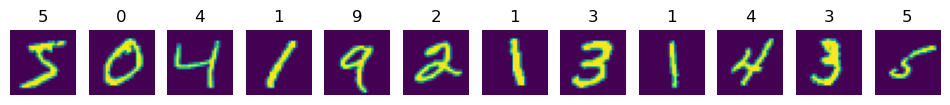

In [5]:
fig = plt.figure(figsize=(12, 12))
for i in range(12):
    fig.add_subplot(2, 12, i + 1).set_title(y_train[i])
    _ = plt.imshow(X_train[i])
    plt.axis("off")
plt.show()

In [6]:
# Scaling
X_train=X_train/255
X_test=X_test/255

### Model Creation

In [7]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [8]:
# Creating Model
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()

/root/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-04-15 10:26:54.321974: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compiling model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Model training
history=model.fit(X_train,y_train,epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8632 - loss: 0.4825 - val_accuracy: 0.9503 - val_loss: 0.1735
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.9608 - loss: 0.1364 - val_accuracy: 0.9663 - val_loss: 0.1188
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9744 - loss: 0.0878 - val_accuracy: 0.9693 - val_loss: 0.1083
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9796 - loss: 0.0661 - val_accuracy: 0.9733 - val_loss: 0.0929
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9860 - loss: 0.0489 - val_accuracy: 0.9753 - val_loss: 0.0948
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9891 - loss: 0.0386 - val_accuracy: 0.9742 - val_loss: 0.0911
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0280 - val_accuracy: 0.9711 - val_loss: 0.1073
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9937 - loss: 0.0235 

In [17]:
# Prediction
y_prob=model.predict(X_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step


array([[1.0869800e-08, 8.7315565e-11, 1.5275135e-07, ..., 9.9985766e-01,
        1.3258951e-08, 2.0585887e-06],
       [9.6584348e-19, 1.6245653e-07, 9.9999988e-01, ..., 8.4130892e-20,
        1.4148737e-11, 3.6548915e-22],
       [1.8568846e-10, 9.9970740e-01, 3.9740742e-05, ..., 5.0472830e-05,
        1.9679237e-04, 7.0188115e-08],
       ...,
       [3.6669783e-17, 1.0703438e-13, 4.0649887e-16, ..., 4.1778748e-08,
        1.3633624e-09, 8.7854829e-07],
       [4.3809781e-15, 1.5988323e-13, 1.1318036e-17, ..., 1.5592342e-11,
        1.6597807e-07, 1.7589353e-15],
       [8.5983094e-15, 5.9330284e-19, 1.6392479e-12, ..., 4.1463772e-20,
        2.0060115e-14, 1.2775939e-18]], dtype=float32)

In [12]:
# Prediction
y_pred=y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

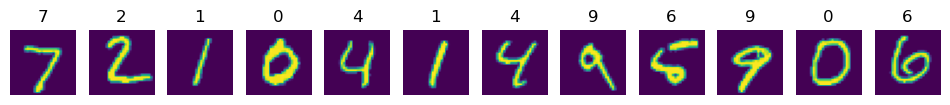

In [13]:
fig = plt.figure(figsize=(12, 12))
for i in range(12):
    fig.add_subplot(2, 12, i + 1).set_title(y_pred[i])
    _ = plt.imshow(X_test[i])
    plt.axis("off")
plt.show()

In [14]:
# Getting Accuracyaccuracy_score
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print(f"Model Accuracy={accuracy}")

Model Accuracy=0.9777


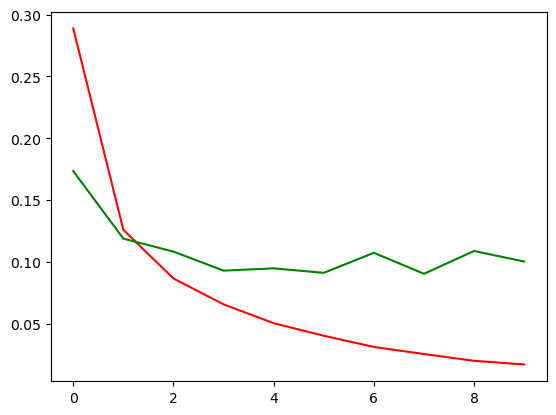

In [15]:
# Plot of loss
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='green', label='val_loss')

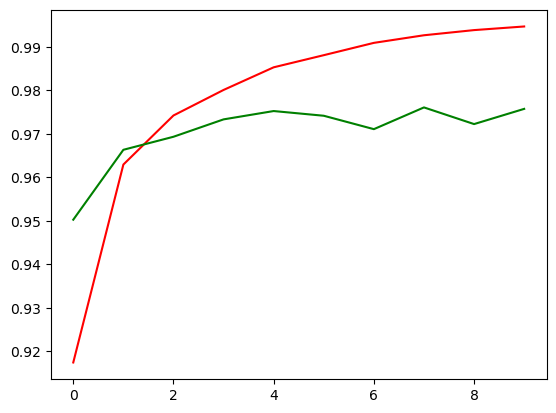

In [16]:
# Plot of accuracy
plt.plot(history.history['accuracy'], color='red', label='accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='val_accuracy')